<a href="https://colab.research.google.com/github/JatinB22/DSlab/blob/main/DSexp2/DSexp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
# Handle missing values using SimpleImputer (replace with the mean value)
imputer = SimpleImputer(strategy='mean')
df['bedrooms'] = imputer.fit_transform(df[['bedrooms']])

In [ ]:
# Display the dataset after imputation
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
# Features and target variable
X = df[['area', 'bedrooms', 'age']]  # Independent variables
y = df['price']  # Dependent variable

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")


Mean Squared Error: 2261228344.5823216


In [ ]:
import matplotlib.pyplot as plt

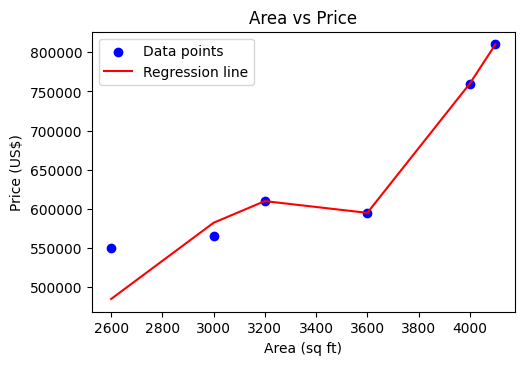

In [ ]:
# 1. Scatter plot of Area vs Price with regression line
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['area'], df['price'], color='blue', label='Data points')
plt.plot(df['area'], model.predict(df[['area', 'bedrooms', 'age']]), color='red', label='Regression line')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (US$)')
plt.legend()

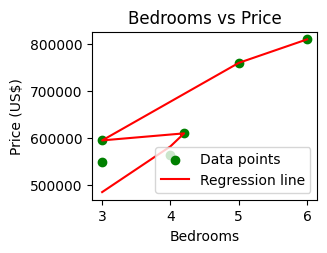

In [ ]:
# 2. Scatter plot of Bedrooms vs Price with regression line
plt.subplot(2, 2, 2)
plt.scatter(df['bedrooms'], df['price'], color='green', label='Data points')
plt.plot(df['bedrooms'], model.predict(df[['area', 'bedrooms', 'age']]), color='red', label='Regression line')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price (US$)')
plt.legend()

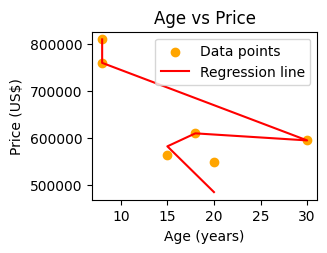

In [ ]:
# 3. Scatter plot of Age vs Price with regression line
plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['price'], color='orange', label='Data points')
plt.plot(df['age'], model.predict(df[['area', 'bedrooms', 'age']]), color='red', label='Regression line')
plt.title('Age vs Price')
plt.xlabel('Age (years)')
plt.ylabel('Price (US$)')
plt.legend()

Text(0, 0.5, 'Predicted Price (US$)')

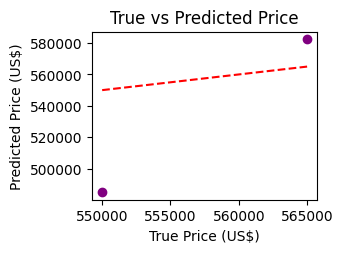

In [ ]:
# 4. Plot the true vs predicted values (actual vs predicted prices)
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Price')
plt.xlabel('True Price (US$)')
plt.ylabel('Predicted Price (US$)')

In [ ]:
# Example: Predict the price for a new house
new_house = pd.DataFrame([[3500, 4, 10]], columns=['area', 'bedrooms', 'age'])
predicted_price = model.predict(new_house)
print(f"\nPredicted price for the new house: ${predicted_price[0]:,.2f}")


Predicted price for the new house: $655,260.12


**Conclusion:** Thus we can performed the experiments and understood that Preprocessing ensures the dataset is clean, complete, and in a form that can be fed into machine learning models or used for meaningful analysis.